In [205]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import great_tables as tg
import altair as alt
import datetime as dt

from matplotlib.pyplot import title

In [206]:
df_path = r"F:\Datasets\video_games\raw_and_processed_user_reviews_sentiment_scores.csv"

In [207]:
df_lazy = pl.scan_csv(df_path)

In [208]:
df = df_lazy.collect()

In [209]:
df.null_count()

game_title,platform,global_user_score,user_score,username,review_text,cleaned_review,language,translated_review,vader_sentiment,textblob_sentiment,hf_sentiment,preprocessed_review
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,71


In [210]:
df = df.with_columns(
    pl.col('preprocessed_review').fill_null('No review')
)

In [211]:
df.null_count()

game_title,platform,global_user_score,user_score,username,review_text,cleaned_review,language,translated_review,vader_sentiment,textblob_sentiment,hf_sentiment,preprocessed_review
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0


In [212]:
df.collect_schema()

Schema([('game_title', String),
        ('platform', String),
        ('global_user_score', Float64),
        ('user_score', Int64),
        ('username', String),
        ('review_text', String),
        ('cleaned_review', String),
        ('language', String),
        ('translated_review', String),
        ('vader_sentiment', Float64),
        ('textblob_sentiment', Float64),
        ('hf_sentiment', Float64),
        ('preprocessed_review', String)])

In [213]:
df

game_title,platform,global_user_score,user_score,username,review_text,cleaned_review,language,translated_review,vader_sentiment,textblob_sentiment,hf_sentiment,preprocessed_review
str,str,f64,i64,str,str,str,str,str,f64,f64,f64,str
"""mario kart wii""","""wii""",8.6,10,"""ShadowStorm6""","""Le meilleur Mario kart. Il est…","""le meilleur mario kart il est …","""fr""","""the best Mario Kart is better …",0.9413,0.383333,0.845252,"""best Mario Kart better fucking…"
"""mario kart wii""","""wii""",8.6,9,"""CooperTrooper79""","""Arguably the best game in the …","""arguably the best game in the …","""en""","""arguably the best game in the …",0.9372,0.1,0.99804,"""arguably best game series comp…"
"""mario kart wii""","""wii""",8.6,0,"""rockodiador""","""Mario Kart Wii? Seriously? Wha…","""mario kart wii seriously what …","""en""","""mario kart wii seriously what …",-0.6124,-0.077381,-0.999683,"""mario kart wii seriously disas…"
"""mario kart wii""","""wii""",8.6,10,"""williamgt45""","""This game is one of my all tim…","""this game is one of my all tim…","""en""","""this game is one of my all tim…",0.7783,-0.076667,-0.98887,"""game one time favorite classic…"
"""mario kart wii""","""wii""",8.6,7,"""WLS_Silver""","""So much fun to play. Played th…","""so much fun to play played thi…","""en""","""so much fun to play played thi…",0.959,0.302041,0.99967,"""much fun play played kid loved…"
…,…,…,…,…,…,…,…,…,…,…,…,…
"""broken sword: the sleeping dra…","""pc""",7.1,3,"""theSplund""","""Reasonable story. Poor control…","""reasonable story poor control …","""en""","""reasonable story poor control …",-0.5709,-0.018056,-0.999223,"""reasonable story poor control …"
"""broken sword: the sleeping dra…","""pc""",7.1,10,"""cumbach""","""It's an memorable game, with b…","""its an memorable game with bea…","""en""","""its an memorable game with bea…",0.9709,0.385,0.9997738,"""memorable game beautiful graph…"
"""broken sword: the sleeping dra…","""pc""",7.1,10,"""IamKing""","""The story, voice acting, dialo…","""the story voice acting dialogu…","""en""","""the story voice acting dialogu…",0.9274,0.283333,0.999609,"""story voice acting dialogue lo…"


In [214]:
df['preprocessed_review'].unique()

preprocessed_review
str
"""review negative aspect game co…"
"""game nothing ground breaking a…"
"""liked game car still plot love…"
"""subpar effort crystal dynamic …"
"""dead rising wrap original stor…"
…
"""campaign give fresh twist trie…"
"""start quality good time manage…"
"""fun multiplayer game shoot foo…"


In [215]:
df.estimated_size('mb')

206.05440616607666

In [216]:
df = df.with_columns(
    pl.col('global_user_score').cast(pl.Float32),
    pl.col('user_score').cast(pl.UInt8),
    pl.col('cleaned_review').str.replace_all(r'\s+', ' '),
    pl.col('language').str.to_uppercase(),
    pl.col('platform').str.to_uppercase(),
    pl.col('translated_review').str.replace_all(r'\s+', ' '),
    pl.col('vader_sentiment').cast(pl.Float32),
    pl.col('textblob_sentiment').cast(pl.Float32),
    pl.col('hf_sentiment').cast(pl.Float32),
    pl.col('preprocessed_review').str.replace_all(r'\s+', ' '),
)

In [217]:
df.write_parquet(r'F:\Datasets\video_games\raw_and_processed_user_reviews_sentiment_scores.parquet')

In [218]:
df_path = r"F:\Datasets\video_games\raw_and_processed_user_reviews_sentiment_scores.parquet"

In [219]:
df_lazy = pl.scan_parquet(df_path).lazy()

In [220]:
df = df_lazy.collect()

In [221]:
df.estimated_size('mb')

197.93839359283447

In [222]:
original_size_mb = 206.05440616607666
reduced_size = df.estimated_size('mb')

f'{original_size_mb - reduced_size} MB'

'8.116012573242188 MB'

In [223]:
df

game_title,platform,global_user_score,user_score,username,review_text,cleaned_review,language,translated_review,vader_sentiment,textblob_sentiment,hf_sentiment,preprocessed_review
str,str,f32,u8,str,str,str,str,str,f32,f32,f32,str
"""mario kart wii""","""WII""",8.6,10,"""ShadowStorm6""","""Le meilleur Mario kart. Il est…","""le meilleur mario kart il est …","""FR""","""the best Mario Kart is better …",0.9413,0.383333,0.845252,"""best Mario Kart better fucking…"
"""mario kart wii""","""WII""",8.6,9,"""CooperTrooper79""","""Arguably the best game in the …","""arguably the best game in the …","""EN""","""arguably the best game in the …",0.9372,0.1,0.99804,"""arguably best game series comp…"
"""mario kart wii""","""WII""",8.6,0,"""rockodiador""","""Mario Kart Wii? Seriously? Wha…","""mario kart wii seriously what …","""EN""","""mario kart wii seriously what …",-0.6124,-0.077381,-0.999683,"""mario kart wii seriously disas…"
"""mario kart wii""","""WII""",8.6,10,"""williamgt45""","""This game is one of my all tim…","""this game is one of my all tim…","""EN""","""this game is one of my all tim…",0.7783,-0.076667,-0.98887,"""game one time favorite classic…"
"""mario kart wii""","""WII""",8.6,7,"""WLS_Silver""","""So much fun to play. Played th…","""so much fun to play played thi…","""EN""","""so much fun to play played thi…",0.959,0.302041,0.99967,"""much fun play played kid loved…"
…,…,…,…,…,…,…,…,…,…,…,…,…
"""broken sword: the sleeping dra…","""PC""",7.1,3,"""theSplund""","""Reasonable story. Poor control…","""reasonable story poor control …","""EN""","""reasonable story poor control …",-0.5709,-0.018056,-0.999223,"""reasonable story poor control …"
"""broken sword: the sleeping dra…","""PC""",7.1,10,"""cumbach""","""It's an memorable game, with b…","""its an memorable game with bea…","""EN""","""its an memorable game with bea…",0.9709,0.385,0.999774,"""memorable game beautiful graph…"
"""broken sword: the sleeping dra…","""PC""",7.1,10,"""IamKing""","""The story, voice acting, dialo…","""the story voice acting dialogu…","""EN""","""the story voice acting dialogu…",0.9274,0.283333,0.999609,"""story voice acting dialogue lo…"


In [224]:
average_score = df.select(
    ((pl.col('global_user_score') + pl.col('user_score')) / 2).alias('average_score')
)

df.insert_column(4, average_score['average_score'])

game_title,platform,global_user_score,user_score,average_score,username,review_text,cleaned_review,language,translated_review,vader_sentiment,textblob_sentiment,hf_sentiment,preprocessed_review
str,str,f32,u8,f32,str,str,str,str,str,f32,f32,f32,str
"""mario kart wii""","""WII""",8.6,10,9.3,"""ShadowStorm6""","""Le meilleur Mario kart. Il est…","""le meilleur mario kart il est …","""FR""","""the best Mario Kart is better …",0.9413,0.383333,0.845252,"""best Mario Kart better fucking…"
"""mario kart wii""","""WII""",8.6,9,8.8,"""CooperTrooper79""","""Arguably the best game in the …","""arguably the best game in the …","""EN""","""arguably the best game in the …",0.9372,0.1,0.99804,"""arguably best game series comp…"
"""mario kart wii""","""WII""",8.6,0,4.3,"""rockodiador""","""Mario Kart Wii? Seriously? Wha…","""mario kart wii seriously what …","""EN""","""mario kart wii seriously what …",-0.6124,-0.077381,-0.999683,"""mario kart wii seriously disas…"
"""mario kart wii""","""WII""",8.6,10,9.3,"""williamgt45""","""This game is one of my all tim…","""this game is one of my all tim…","""EN""","""this game is one of my all tim…",0.7783,-0.076667,-0.98887,"""game one time favorite classic…"
"""mario kart wii""","""WII""",8.6,7,7.8,"""WLS_Silver""","""So much fun to play. Played th…","""so much fun to play played thi…","""EN""","""so much fun to play played thi…",0.959,0.302041,0.99967,"""much fun play played kid loved…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""broken sword: the sleeping dra…","""PC""",7.1,3,5.05,"""theSplund""","""Reasonable story. Poor control…","""reasonable story poor control …","""EN""","""reasonable story poor control …",-0.5709,-0.018056,-0.999223,"""reasonable story poor control …"
"""broken sword: the sleeping dra…","""PC""",7.1,10,8.55,"""cumbach""","""It's an memorable game, with b…","""its an memorable game with bea…","""EN""","""its an memorable game with bea…",0.9709,0.385,0.999774,"""memorable game beautiful graph…"
"""broken sword: the sleeping dra…","""PC""",7.1,10,8.55,"""IamKing""","""The story, voice acting, dialo…","""the story voice acting dialogu…","""EN""","""the story voice acting dialogu…",0.9274,0.283333,0.999609,"""story voice acting dialogue lo…"


In [225]:
most_popular_platforms = df['platform'].value_counts(sort=True)
most_popular_platforms

platform,count
str,u32
"""PC""",25251
"""XBOX-360""",15318
"""PLAYSTATION-3""",15130
"""PLAYSTATION-2""",7934
"""PLAYSTATION-4""",7276
…,…
"""XBOX-SERIES-X""",325
"""PLAYSTATION""",170
"""DREAMCAST""",79


In [226]:
fig = px.bar(
    data_frame=most_popular_platforms,
    x='platform',
    y='count',
).update_layout(
    title='Most popular platforms',
    width=1000,
    height=800,
    showlegend=True,  # Enable legend
)

fig.show()

In [227]:
fig = px.pie(
    data_frame=most_popular_platforms,
    names='platform',
    values='count',
).update_layout(
    title='Most popular platforms',
    width=1200,
    height=750,
)

fig.show()

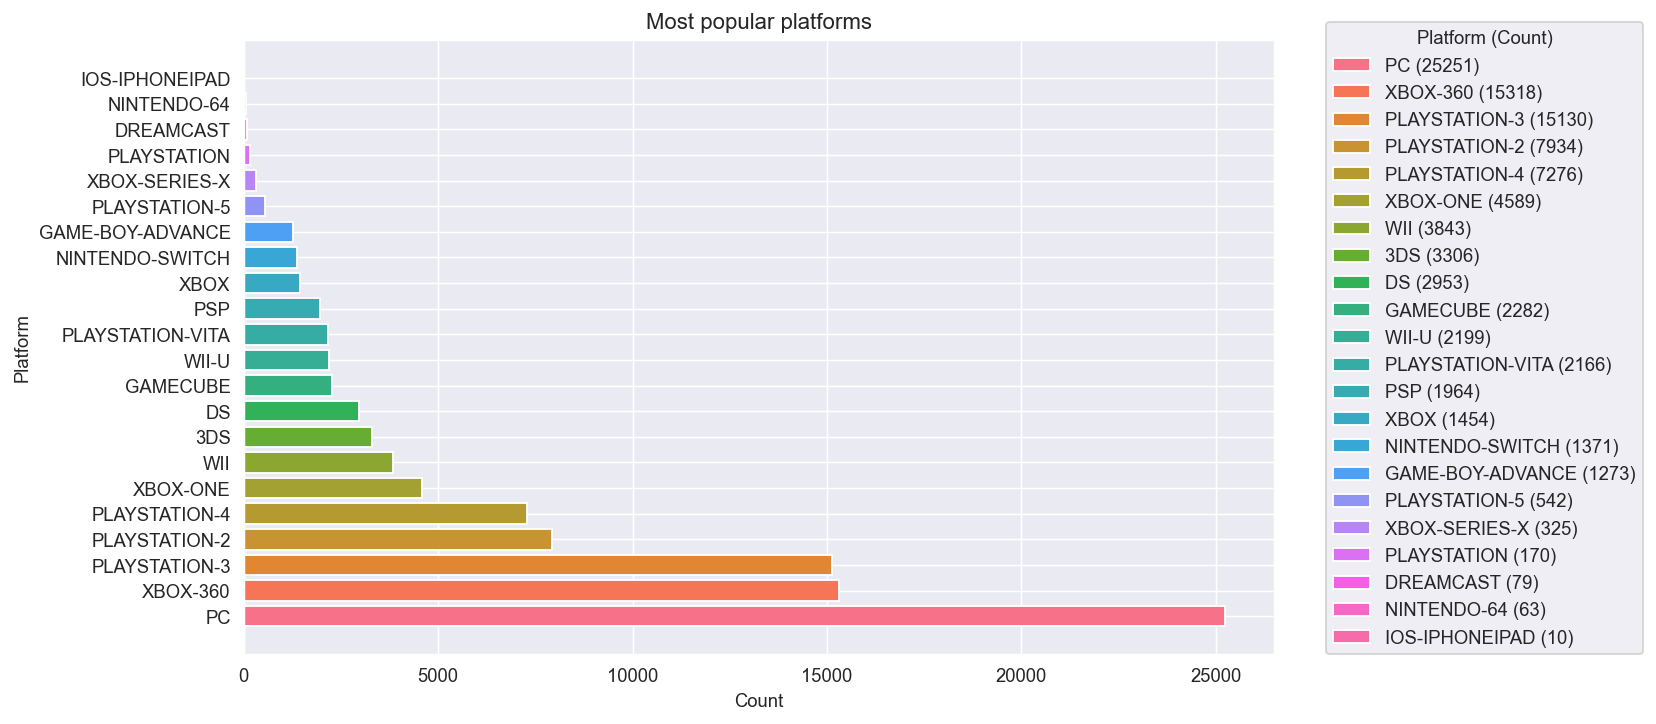

In [228]:
from seaborn import color_palette

plt.figure(figsize=(10, 6), dpi=133)

palette = color_palette("husl", len(most_popular_platforms))
colors = palette.as_hex()

bars = plt.barh(most_popular_platforms['platform'], most_popular_platforms['count'], color=colors)

legend_labels = [f"{row['platform']} ({row['count']})" for _, row in most_popular_platforms.to_pandas().iterrows()]
plt.legend(bars, legend_labels, loc=[1.05, 0], title='Platform (Count)')

plt.title('Most popular platforms')
plt.xlabel('Count')
plt.ylabel('Platform')

plt.show()

In [232]:
data_list = most_popular_platforms.to_dicts()

chart = (
    alt.Chart(alt.InlineData(values=data_list))
    .transform_calculate(
        legend_label = 'datum.platform + " (" + toString(datum.count) + ")"'
    )
    .mark_bar()
    .encode(
        y=alt.Y('platform:N', sort='-x', title='Platform'),
        x=alt.X('count:Q', title='Count'),
        color=alt.Color(
            'legend_label:N',
            legend=alt.Legend(title='Platform (Count)')
        ),
        tooltip=[
            alt.Tooltip('platform:N', title='Platform'),
            alt.Tooltip('count:Q', title='Count'),
        ]
    )
    .properties(
        title='Most Popular Platforms',
        width=600,
        height=400
    )
)

chart.show()

alt.Chart(...)

In [230]:
global_user_score_top_games

game_title,platform,global_user_score,user_score,average_score,username,review_text,cleaned_review,language,translated_review,vader_sentiment,textblob_sentiment,hf_sentiment,preprocessed_review
str,str,f32,u8,f32,str,str,str,str,str,f32,f32,f32,str
"""madden nfl 10""","""PLAYSTATION-2""",10.0,10,10.0,"""Beats""","""no real improvements but i lov…","""no real improvements but i lov…","""EN""","""no real improvements but i lov…",0.9337,0.341667,0.991731,"""real improvement love madden g…"
"""winning eleven: pro evolution …","""PSP""",10.0,10,10.0,"""ninjasaurio13""","""obra maetsra dwabdgweiabdlwbaG…","""obra maetsra dwabdgweiabdlwbag…","""CY""","""two-way work, two-way work, tw…",0.0,0.0,0.997698,"""work work work work work work …"
"""high school musical: sing it!""","""PLAYSTATION-2""",10.0,10,10.0,"""Wubble33""","""By far the best comedy in vide…","""by far the best comedy in vide…","""EN""","""by far the best comedy in vide…",0.9663,0.31,0.999804,"""far best comedy video game his…"
"""nba 2k10""","""WII""",10.0,10,10.0,"""MonsieurEames""","""This was the first NBA 2K game…","""this was the first nba k game …","""EN""","""this was the first nba k game …",0.9022,0.158333,0.973071,"""first nba k game ever played f…"
"""tiger woods pga tour 07""","""PLAYSTATION-3""",10.0,10,10.0,"""hensi""","""Best golf game of all times. I…","""best golf game of all times iv…","""EN""","""best golf game of all times iv…",0.7184,-0.12,0.999325,"""best golf game time ive playin…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""data east arcade classics""","""WII""",10.0,10,10.0,"""LORDTIKIDCANCER""","""the best compilation of the wi…","""the best compilation of the wi…","""EN""","""the best compilation of the wi…",0.8176,0.202381,0.999792,"""best compilation wii historica…"
"""world championship poker: delu…","""PLAYSTATION-2""",10.0,10,10.0,"""Gamesoc""","""Huuuuuuuuuuuuuuuuuuuuuuuuuuuuu…","""huuuuuuuuuuuuuuuuuuuuuuuuuuuuu…","""SO""","""No, no, no, no. No, no, no, no…",-0.5267,0.0,-0.986607,"""No No"""
"""the legend of alon d'ar""","""PLAYSTATION-2""",10.0,10,10.0,"""gman321""","""This game is a little slow, bu…","""this game is a little slow but…","""EN""","""this game is a little slow but…",0.9055,0.022309,0.998781,"""game little slow story quite u…"
